<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/ROI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

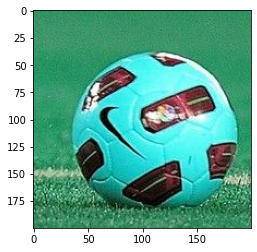

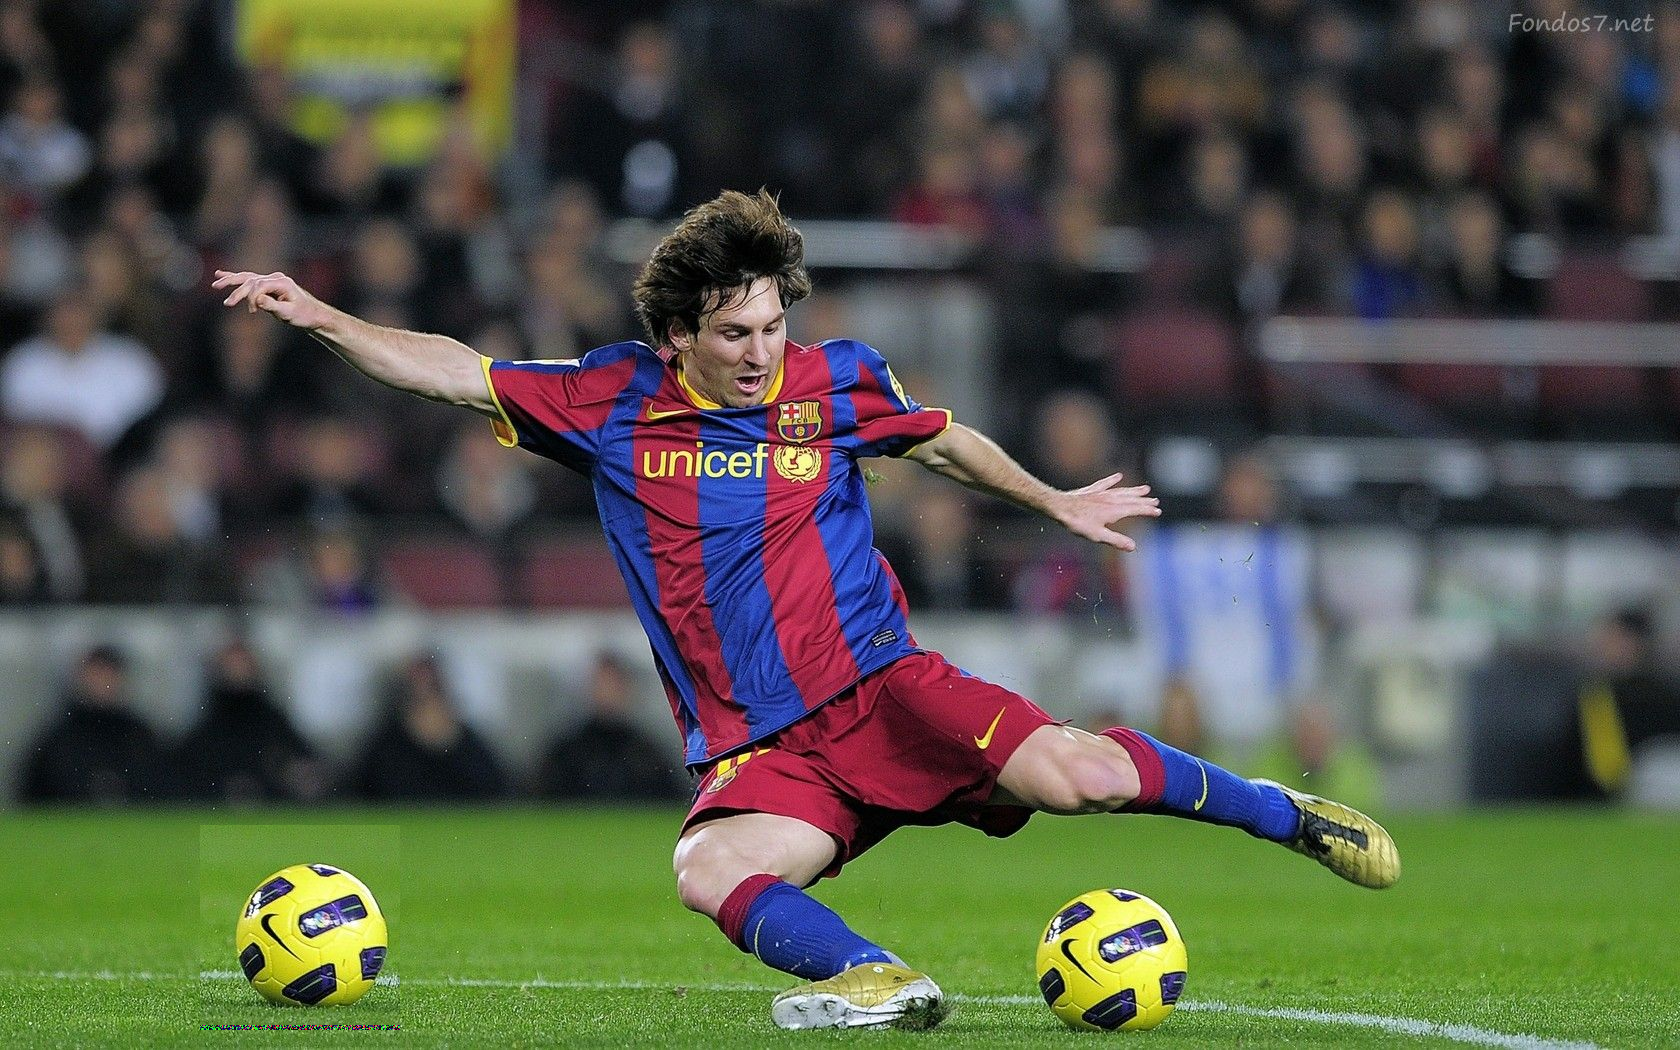

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from google.colab.patches import cv2_imshow

def applyPadding(array):
  new = np.zeros((array.shape[0]+6,array.shape[1]+6,array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+3,j+3,s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     


image = cv2.imread('roi.jpg')
ball = image[850:1050,1000:1200]
plt.imshow(ball)
plt.show()
image1 = image
for i in range(200):
  for j in range(200): 
    image1[830+i,200+j] = image[830+i,200+j]^ball[i,j]
    image1[825+i,200+j] = image[825+i,200+j]&ball[i,j]
    image1[825+i,200+j] = image[825+i,200+j]|ball[i,j]
# kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
kernel_box = np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],])
kernel_box = kernel_box/49
filtered = applyKernel(kernel_box,image1)
# image1 = cv2.GaussianBlur(image1,(15,15),cv2.BORDER_DEFAULT)
cv2_imshow(image1)
# plt.show()